<a href="https://colab.research.google.com/github/pa1kpuram/projects/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Walmart's Data Mastery: Unveiling the Power of Confidence Intervals and the Central Limit Theorem**

# **Table of Contents**

Walmart's Data Mastery: Unveiling the Power of Confidence Intervals and the Central Limit Theorem

1. **Introduction**

    🛍️ Introduction to Walmart

    Business Problem

    🎯 Objective

2. **Exploratory Data Analysis**
    
    📊 Statistical Summary
    
    👥 Duplicate Detection

    ✅ Sanity Check for columns

    👨🏽‍💻 Missing Value Analysis

    🔍📈Detecting Outliers

3. **Univariate Analysis**

    🙎🏻‍♂️🙎🏻‍♀️ Gender Distribution

     Age Distribution
    
    💰 Purchase Distribution

4. **Bivariate Analysis**

    🙎🏻‍♂️🙎🏻‍♀️ Gender VS 💰 Purchase Amount

    Age VS 💰 Purchase Amount

    👩🏻‍🤝‍🧑🏻Marital Status VS 💰 Purchase Amount

5. **Analysis of Average Spending and Purchase Amount by Gender**

    5.1 Average Purchase Amount by Gender

    5.2 Confidence Intervals for Average Spending by Gender

6. **Analysis of Purchase Amount and Average Spending by Marital Status**

    6.1 Average Purchase Amount by Marital Status

    6.2 Confidence Intervals for Average Spending by Marital Status

7. **Analysis of Purchase Amount and Average Spending by Age Group**

    7.1 Average Purchase Amount by Age Group

    7.2 Confidence Intervals for Average Spending by Age Group

8. **Business Recommendations**

# **1. Introduction**

## **🛍️ Introduction to Walmart:**

Walmart Inc. stands as a global retail giant, with a presence in numerous countries and serving over 100 million customers worldwide. Founded in the United States, Walmart operates a vast network of supercenters, discount departmental stores, and grocery outlets, offering a wide range of products to consumers.

## **Business Problem:**

In the fast-paced retail landscape, understanding customer behavior is crucial for Walmart to maintain its competitive edge. Specifically, during events like Black Friday, where consumer spending peaks, Walmart seeks to delve deeper into customer purchase behavior. The management team aims to analyze how customer spending patterns vary based on gender and other demographic factors, such as marital status and age. By gaining insights into these spending habits, Walmart can make informed decisions to enhance its marketing strategies, product offerings, and overall customer experience.

## **🎯 Objective**

The objective of this project is to conduct a comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc. This study aims to provide valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.

## **📃 Features of the dataset:**

| Feature | Description |
|:--------|:------------|
| User_ID | Unique identifier for the customer |
| Product_ID | Unique identifier for the purchased product |
| Gender | Gender of the customer (Male/Female) |
| Age | Age of the customer (in bins) |
| Occupation | Occupation of the customer (Masked) |
| City_Category | Category of the city where the customer resides (A, B, C) |
| StayInCurrentCityYears | Number of years the customer has stayed in the current city |
| Marital_Status | Marital status of the customer (0 for unmarried, 1 for married) |
| ProductCategory | Category of the purchased product (Masked) |
| Purchase | Amount spent by the customer on the purchase |


# **2. Exploratory Data Analysis**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [ ]:
# loading the dataset
df = pd.read_csv('/content/walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### 🔍 Insights

- The dataset has 10 features, mixing numeric and categorical data.
- `Purchase` is the only numeric column, representing the purchase amount.
- All other columns are categorical and have been converted to the 'category' data type.
- This conversion optimizes memory usage and improves processing efficiency.

## 🔁 Changing the Datatype of Columns

In [ ]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## 📝 Statistical Summary

### Satistical summary of object type columns

In [ ]:
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


### 🔍 Insights

1. **User_ID**: Among 550,068 transactions, there are 5,891 unique user IDs, indicating that many customers made multiple purchases.
   
2. **Product_ID**: There are 3,631 unique products, with the product P00265242 being the top seller at 1,880 units sold.

3. **Gender**: Of the 550,068 transactions, 414,259 (approximately 75%) were made by male customers, indicating a significant disparity in purchase behavior between males and females during Black Friday.

4. **Age**: There are 7 unique age groups, with the 26-35 age group making the most transactions at 219,587. This will be analyzed further.

5. **Stay_In_Current_City_Years**: Customers with a 1-year stay in their current city made the most transactions (193,821), compared to those with 0, 2, 3, or 4+ years of stay.

6. **Marital_Status**: 59% of the total transactions were made by unmarried customers, while 41% were by married customers.

### Satistical summary of  numerical data type columns

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


### 🔍 Insights
The purchase amounts in the dataset exhibit significant variation, ranging from a minimum of `$12` to a maximum of `$23,961`. Interestingly, the median purchase amount of `$8,047` falls below the mean of `$9,264`, suggesting a `right-skewed distribution`. This skewness indicates that a few high-value purchases disproportionately elevate the `mean`, while the majority of purchases cluster at lower amounts.

## 👥 Duplicate Detection

In [ ]:
df.duplicated().value_counts()

False    550068
Name: count, dtype: int64

### 🔍 Insights
The dataset does not contain any duplicate entries.

## ✅ Sanity Check for columns

In [ ]:
# checking the unique values for columns
for i in df.columns:
    print('Unique Values in',i,'column are :-')
    print(df[i].unique())
    print('-'*100)

Unique Values in User_ID column are :-
[1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
----------------------------------------------------------------------------------------------------
Unique Values in Product_ID column are :-
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
----------------------------------------------------------------------------------------------------
Unique Values in Gender column are :-
['F', 'M']
Categories (2, object): ['F', 'M']
----------------------------------------------------------------------------------------------------
Unique Va

### 🔍 Insights
The dataset shows no abnormal values, indicating that all entries fall within expected ranges or categories. Additionally, in the Marital Status column, where 0 and 1 are used, we will interpret 0 as "unmarried" and 1 as "married." This conversion simplifies the interpretation of marital status and allows for clearer analysis.

In [ ]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

## 👨🏽‍💻 Missing Value Analysis

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### 🔍 Insights

The dataset does not contain any missing values.

### **Statistical Summary for Outliers**

In [ ]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
print(f"Outliers:\n{outliers}")


Number of outliers: 2677
Outliers:
        User_ID Product_ID Gender    Age Occupation City_Category  \
343     1000058  P00117642      M  26-35          2             B   
375     1000062  P00119342      F  36-45          3             A   
652     1000126  P00087042      M  18-25          9             B   
736     1000139  P00159542      F  26-35         20             C   
1041    1000175  P00052842      F  26-35          2             B   
...         ...        ...    ...    ...        ...           ...   
544488  1005815  P00116142      M  26-35         20             B   
544704  1005847  P00085342      F  18-25          4             B   
544743  1005852  P00202242      F  26-35          1             A   
545663  1006002  P00116142      M  51-55          0             C   
545787  1006018  P00052842      M  36-45          1             C   

       Stay_In_Current_City_Years Marital_Status Product_Category  Purchase  
343                             3      Unmarried          

### 🔍 Insights on Outliers Detection

- **Number of Outliers**: 2,677 high-value transactions.
- **Product Focus**: High outliers in products like `P00116142`, `P00052842`, and Product Category `10`.
- **Demographics**: Diverse representation among outliers, with significant transactions from the `26-35` age group, both genders, and all city categories.
- **Marital Status**: Slight skew towards unmarried customers among outliers.

# **3 Univariate Analysis**

## **3.1 Gender Distribution**

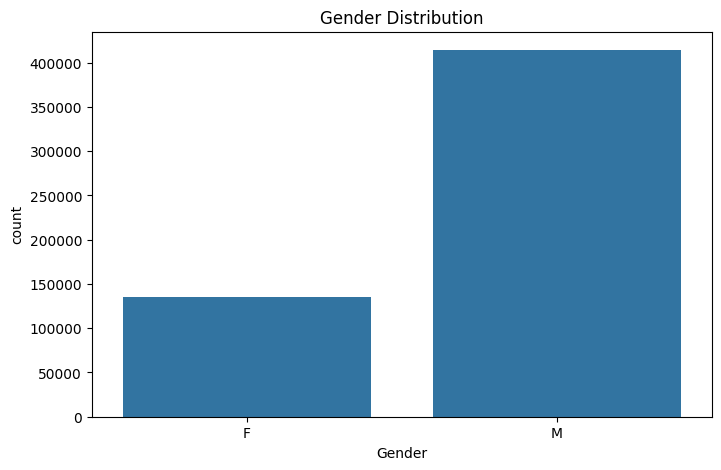

In [ ]:
# Countplot for Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

## **3.1.2 Age Distribution**

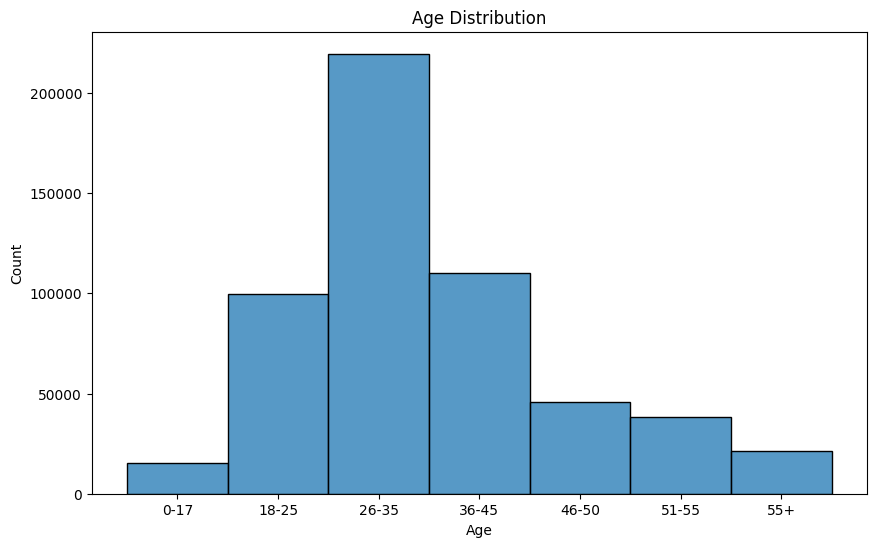

In [ ]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', discrete=True)
plt.title('Age Distribution')
plt.show()


## **3.1.3 Purchase Distribution**

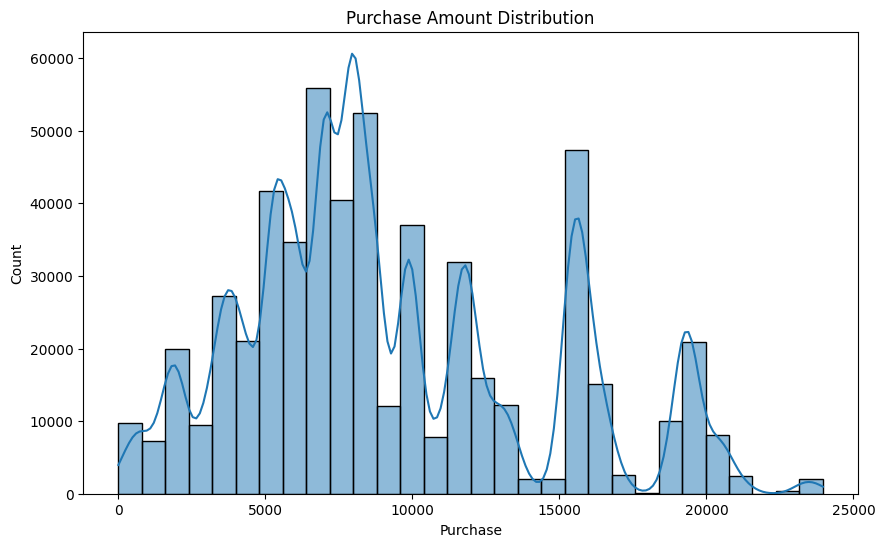

In [ ]:
# Histogram for Purchase
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', bins=30, kde=True)
plt.title('Purchase Amount Distribution')
plt.show()

### 🔍 Insights for Univariate Analysis

#### Gender Distribution
- **Observation**: ~75% of transactions are by male customers.
- **Insight**: Marketing strategies could focus on increasing female customer participation.

#### Age Distribution
- **Observation**: The `26-35` age group has the highest transaction frequency.
- **Insight**: Targeted promotions for this age segment can maximize sales.

#### Purchase Amount Distribution
- **Observation**: Purchase amounts are right-skewed, with a mean of $9,263.97 and some high-value outliers.
- **Insight**: High-value transactions suggest opportunities to identify and promote high-demand products.

# **4 Bivariate Analysis**

## **4.1 Gender vs. Purchase**

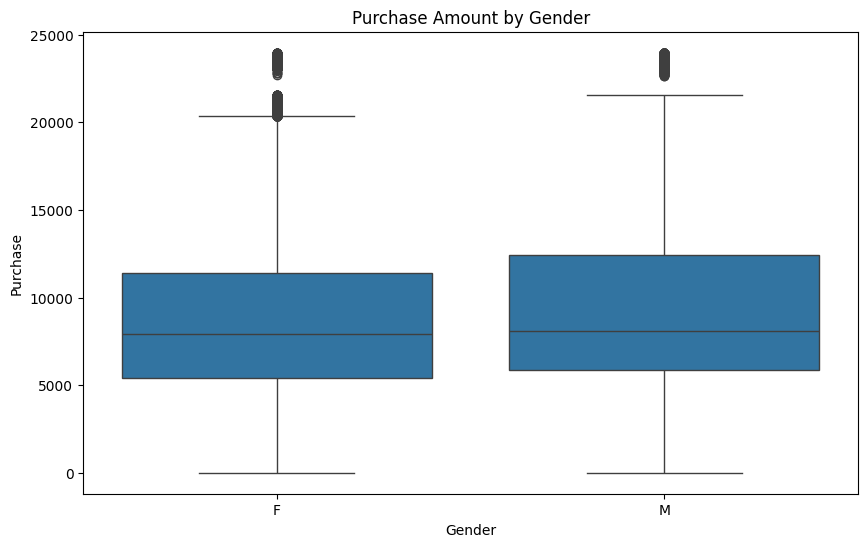

In [ ]:
# Boxplot for Gender vs. Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Purchase Amount by Gender')
plt.show()

## **4.2 Age vs. Purchase**

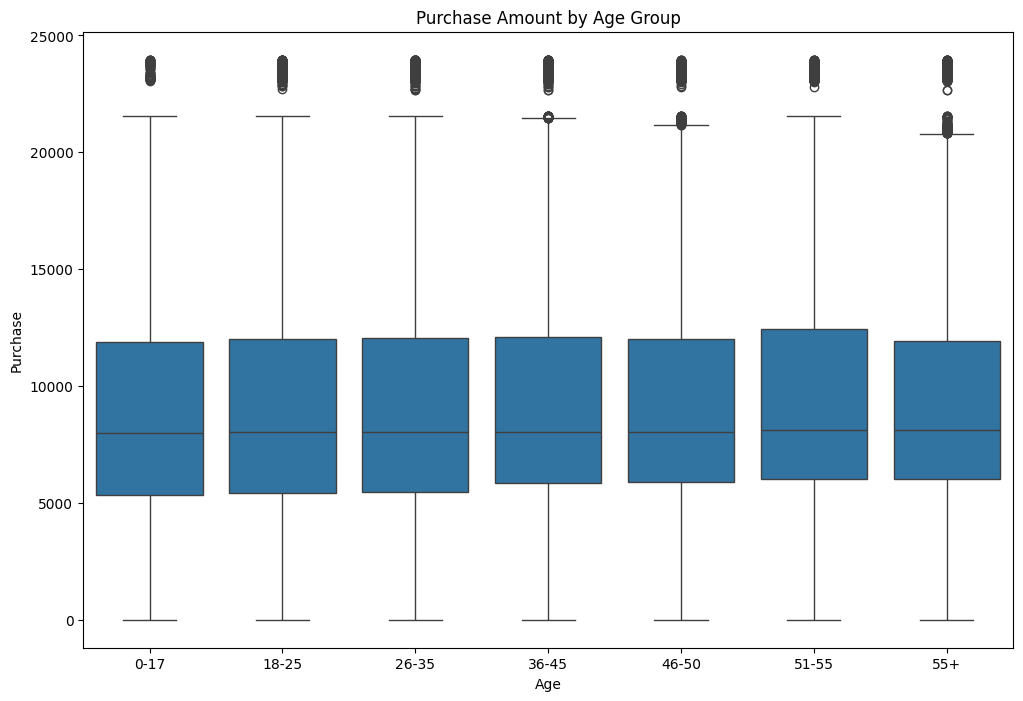

In [ ]:
# Boxplot for Age vs. Purchase
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Purchase Amount by Age Group')
plt.show()


## **4.3 Marital Status vs. Purchase**

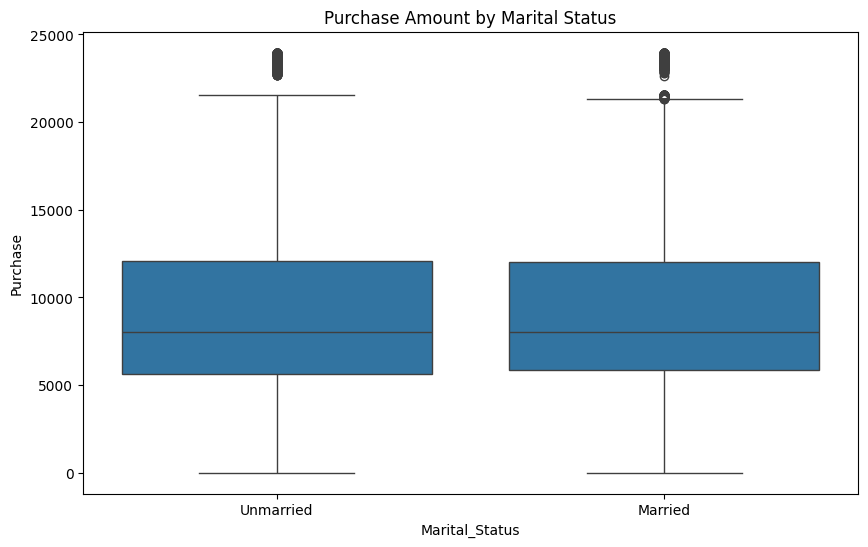

In [ ]:
# Boxplot for Marital Status vs. Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.title('Purchase Amount by Marital Status')
plt.show()


## **4.4 City Category vs. Purchase**

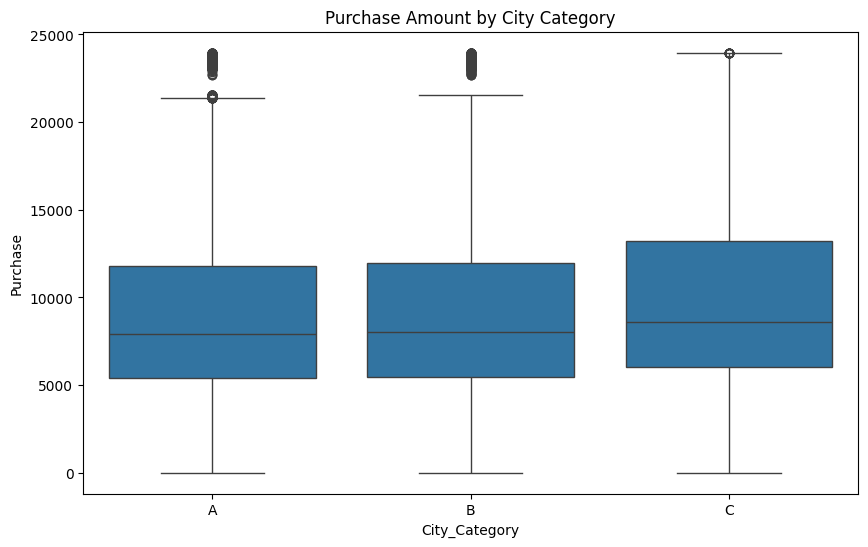

In [ ]:
# Boxplot for City Category vs. Purchase
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='City_Category', y='Purchase')
plt.title('Purchase Amount by City Category')
plt.show()


### 🔍 Insights for Bivariate Analysis

#### Gender vs. Purchases
- **Observation**: The average purchase amount for males and females shows some variation, but the distribution has a similar spread.
- **Insight**: Both genders have similar spending patterns, but the higher number of transactions by males drives overall sales. Walmart can explore strategies to balance the gender disparity in transactions.

#### Age vs. Purchases
- **Observation**: The `26-35` age group has the highest average purchase amount, followed by `36-45` and `18-25`.
- **Insight**: Younger adults (26-35) are the primary spenders. Targeted marketing and tailored promotions for this age group could enhance sales further.

#### Marital Status vs. Purchases
- **Observation**: Unmarried customers tend to have slightly higher average purchases compared to married customers.
- **Insight**: Marketing strategies could be developed to cater to unmarried customers, potentially highlighting products or services that appeal to this demographic.

#### City Category vs. Purchases
- **Observation**: Purchases are fairly consistent across city categories (A, B, C), with no significant differences in average purchase amounts.
- **Insight**: Demand is uniform across different city categories, indicating a broad, nationwide appeal. Walmart can maintain consistent inventory and marketing efforts across all city categories.

# **5  Analysis of Average Spending and Purchase Amount by Gender**

## **5.1 Average Purchase Amount by Gender**

In [ ]:
# Average Purchase Amount by Gender
average_purchase_gender = df.groupby('Gender')['Purchase'].mean()
print(average_purchase_gender)


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


### 🔍 Insights for Average Purchase Amount by Gender

- **Observation**: The average purchase amount for female customers is `$8,734.57`, while for male customers it is `$9,437.53`.
- **Insight**: Male customers spend more on average compared to female customers. This suggests that marketing campaigns could focus on further increasing the spending of male customers. Additionally, strategies to encourage higher spending by female customers, such as personalized promotions or product recommendations, could help bridge the spending gap.

## **5.2 Confidence Intervals for Average Spending by Gender**

In [ ]:
from scipy import stats

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return (mean, mean - margin, mean + margin)

# Confidence intervals for Male and Female
male_purchase = df[df['Gender'] == 'M']['Purchase']
female_purchase = df[df['Gender'] == 'F']['Purchase']

male_ci = confidence_interval(male_purchase)
female_ci = confidence_interval(female_purchase)

print(f"Confidence Interval for Male: {male_ci}")
print(f"Confidence Interval for Female: {female_ci}")


Confidence Interval for Male: (9437.526040472265, 9422.019402055814, 9453.032678888716)
Confidence Interval for Female: (8734.565765155476, 8709.21132117373, 8759.92020913722)


### 🔍 Insights for Confidence Intervals for Average Spending by Gender

- **Observation**:
  - The confidence interval for the average spending by male customers is `($9422.02, $9453.03)`.
  - The confidence interval for the average spending by female customers is `($8709.21, $8759.92)`.

- **Insight**: The confidence intervals do not overlap, indicating a statistically significant difference in average spending between male and female customers. Walmart can leverage this insight by tailoring marketing strategies to each gender, potentially offering targeted promotions to female customers to encourage higher spending.

# **6 Analysis of Purchase Amount and Average Spending by Marital Status**

## **6.1 Average Purchase Amount by Marital Status**

In [ ]:
# Average Purchase Amount by Marital Status
average_purchase_marital = df.groupby('Marital_Status')['Purchase'].mean()
print(average_purchase_marital)


Marital_Status
Unmarried    9265.907619
Married      9261.174574
Name: Purchase, dtype: float64


### 🔍 Insights for Average Purchase Amount by Marital Status

- **Insight**: The average purchase amounts for unmarried and married customers are very similar, with unmarried customers spending slightly more on average `($9265.91)` compared to married customers `($9261.17)`.

## **6.2 Confidence Intervals for Average Spending by Marital Status**

In [ ]:
# Confidence intervals for Married and Unmarried
married_purchase = df[df['Marital_Status'] == 'Unmarried']['Purchase']
unmarried_purchase = df[df['Marital_Status'] == 'Married']['Purchase']

married_ci = confidence_interval(married_purchase)
unmarried_ci = confidence_interval(unmarried_purchase)

print(f"Confidence Interval for Married: {married_ci}")
print(f"Confidence Interval for Unmarried: {unmarried_ci}")


Confidence Interval for Married: (9265.907618921507, 9248.616353737028, 9283.198884105985)
Confidence Interval for Unmarried: (9261.174574082374, 9240.460315792989, 9281.888832371758)


### 🔍 Insights for Confidence Intervals for Average Spending by Marital Status

- **Insight**:
  - The confidence interval for the average spending by married customers is `($9248.62, $9283.20)`.
  - The confidence interval for the average spending by unmarried customers is `($9240.46, $9281.89)`.

The confidence intervals for married and unmarried customers overlap significantly, indicating no substantial difference in average spending between the two groups.

# **7  Analysis of Purchase Amount and Average Spending by Age Group**

## **7.1 Average Purchase Amount by Age Group**

In [ ]:
# Average Purchase Amount by Age Group
average_purchase_age = df.groupby('Age')['Purchase'].mean()
print(average_purchase_age)


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


## **7.2 Confidence Intervals for Average Spending by Age Group**

In [ ]:
# Confidence intervals for each age group
age_groups = df['Age'].unique()
for age_group in age_groups:
    age_group_purchase = df[df['Age'] == age_group]['Purchase']
    age_group_ci = confidence_interval(age_group_purchase)
    print(f"Confidence Interval for Age Group {age_group}: {age_group_ci}")


Confidence Interval for Age Group 0-17: (8933.464640444974, 8851.941436361221, 9014.987844528727)
Confidence Interval for Age Group 55+: (9336.280459449405, 9269.295063935433, 9403.265854963376)
Confidence Interval for Age Group 26-35: (9252.690632869888, 9231.733560884022, 9273.647704855754)
Confidence Interval for Age Group 46-50: (9208.625697468327, 9163.08393647555, 9254.167458461105)
Confidence Interval for Age Group 51-55: (9534.808030960236, 9483.989875153999, 9585.626186766473)
Confidence Interval for Age Group 36-45: (9331.350694917874, 9301.669084404875, 9361.032305430872)
Confidence Interval for Age Group 18-25: (9169.663606261289, 9138.40756914702, 9200.919643375557)


### 🔍 Insights for Confidence Intervals for Average Spending by age group


Observing the confidence intervals for average spending by age group reveals some interesting highlights:

- **Age Group 51-55**: This demographic exhibits the highest estimated average spending, with a range between approximately `$9483` and `$9585`. This suggests that individuals in their early 50s are the most significant spenders among the age groups analyzed.
  
- **Age Group 18-25**: Despite being younger, individuals in this age range also show relatively high estimated average spending, with a range between approximately `$9138` and `$9200`. This might be attributed to factors such as disposable income or spending habits influenced by lifestyle choices and trends.

- **Age Group 55+**: While not the highest, individuals aged 55 and above also demonstrate noteworthy estimated average spending, with a range between approximately `$9269` and `$9403`. This indicates that older demographics continue to contribute substantially to overall spending patterns.

- **Age Group 0-17**: Surprisingly, even though this group includes minors, their estimated average spending still falls within a notable range of approximately `$8851` to `$9014`. This could be influenced by parental spending on behalf of children or discretionary income among teenagers.

These observations underscore the importance of understanding age-related spending behaviors to tailor marketing strategies and product offerings effectively across different age demographics.

# **8 Business Recomendations**

**Business Recommendations:**

1. **Gender-Targeted Marketing**: Develop gender-specific marketing campaigns to address the significant disparity in purchase behavior between male and female customers observed during Black Friday. Focus on increasing female customer participation through targeted promotions and incentives tailored to their preferences.

2. **Age-Specific Promotions**: Capitalize on the spending patterns of the 26-35 age group, which exhibits the highest transaction frequency. Implement targeted promotions and product offerings to maximize sales from this demographic segment. Additionally, consider strategies to attract younger adults (18-25) who also demonstrate relatively high average spending.

3. **Product Focus**: Identify and promote high-demand products, such as those with high outlier values like P00116142 and P00052842. Tailor marketing efforts towards these products to capitalize on their popularity and drive sales further.

4. **Marital Status Marketing**: Develop marketing strategies to cater to both married and unmarried customers, considering their slight differences in average spending. Highlight products or services that appeal to each demographic segment, potentially offering exclusive deals or incentives to encourage higher spending.

5. **Customer Segmentation**: Utilize demographic information, including age and marital status, for customer segmentation. Customize marketing communications and promotions based on these segmentation criteria to enhance customer engagement and drive sales.

6. **Continuous Monitoring and Adaptation**: Continuously monitor spending trends and consumer preferences to adapt strategies and offerings accordingly. Stay agile and responsive to changing market dynamics, ensuring relevance and effectiveness in attracting and retaining customers.

By implementing these recommendations, Walmart can optimize its marketing efforts, enhance customer satisfaction, and drive revenue growth during Black Friday and beyond.